In [2]:
import sys
sys.path.append('..')

In [11]:
# load regression data from sklearn
from sklearn.datasets import load_diabetes
import numpy as np

data = load_diabetes()
X = data.data
y = data.target

# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train stacking model
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

stack = StackingRegressor([
    ( "lr", LinearRegression()),
    ( "rf", RandomForestRegressor()),
    ("svr", SVR())
], LinearRegression())
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

# train my stacking model
from ensemble.Stacking import Stacking

stack = Stacking([
    LinearRegression(),
    RandomForestRegressor(),
    SVR()
], LinearRegression())
stack.fit(X_train, y_train)
y_pred2 = stack.predict(X_test)

# evaluate model
from sklearn.metrics import mean_squared_error
print('sklearn:', mean_squared_error(y_test, y_pred))
print('my:', mean_squared_error(y_test, y_pred2))



sklearn: 2899.431347158867
my: 2810.827027070967


In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import time
from ensemble.Stacking import Stacking
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import numpy as np


# Load the california housing dataset
data = fetch_california_housing()

# function to get random range from dataset with size
def get_random_range(data, size):
    idx = np.random.choice(data.data.shape[0], size, replace=False)
    return data.data[idx], data.target[idx]

def benchmark_regressor():
    mse = []
    train_times = []
    for i in range(100, 5000, 50):
        X, y = get_random_range(data, i)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        
        reg = Stacking([LinearRegression(), DecisionTreeRegressor(), SVR()], LinearRegression())
        start = time.time()
        reg.fit(X_train, y_train)
        train_times.append(time.time() - start)
        y_pred = reg.predict(X_test)
        mse.append(mean_squared_error(y_test, y_pred))
    
    # plot the results
    import matplotlib.pyplot as plt
    plt.plot(range(100, 5000, 50), mse)
    plt.xlabel('Number of samples')
    plt.ylabel('MSE')
    plt.title('MSE vs Number of samples')
    plt.show()

    plt.plot(range(100, 5000, 50), train_times)
    plt.xlabel('Number of samples')
    plt.ylabel('Training time')
    plt.title('Training time vs Number of samples')
    plt.show()




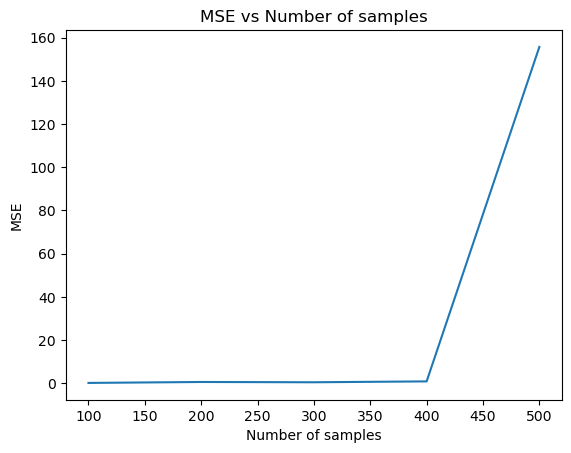

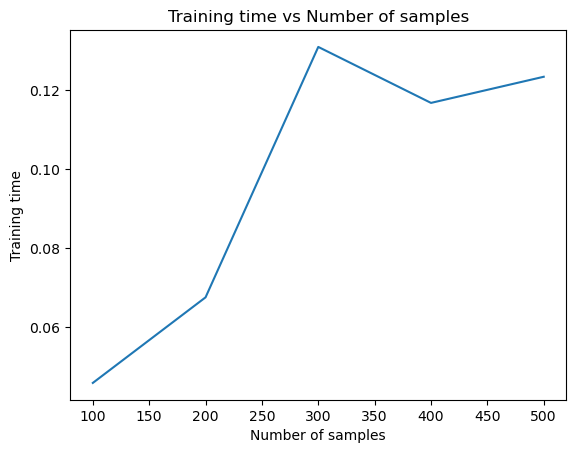

In [8]:

mse = []
train_times = []
for i in range(100, 501, 100):
    X, y = get_random_range(data, i)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    reg = Stacking([LinearRegression(), DecisionTreeRegressor(), SVR()], LinearRegression())
    start = time.time()
    reg.fit(X_train, y_train)
    train_times.append(time.time() - start)
    y_pred = reg.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred))

# plot the results
import matplotlib.pyplot as plt
plt.plot(range(100, 501, 100), mse)
plt.xlabel('Number of samples')
plt.ylabel('MSE')
plt.title('MSE vs Number of samples')
plt.show()

plt.plot(range(100, 501, 100), train_times)
plt.xlabel('Number of samples')
plt.ylabel('Training time')
plt.title('Training time vs Number of samples')
plt.show()



In [ ]:

raise Exception('Stop here')
benchmark_regressor()